# Data Pipeline in Tensorflow

> In this post, it will introduce the usage of training and predict from keras models using using generators. A flexible and efficient data pipeline is one of the most essential parts of deep learning model development. In this week you will learn a powerful workflow for loading, processing, filtering and even augmenting data on the fly using tools from Keras and the tf.data module. This is the summary of lecture "Customizing your model with Tensorflow 2" from Coursera.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams['figure.figsize'] = (16, 10)

In [2]:
print('Tensorflow: v' + tf.__version__)

Tensorflow: v2.4.1


## Keras datasets

### MNIST Dataset
```python
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

### CIFAR-10 Dataset
```python
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

### IMDB Dataset
```python
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000, max_len=100)
```

### Coding Tutorial

For a list of Keras datasets and documentation on recommended usage, see [this link](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [4]:
# Confirm that reloading the dataset does not require a download
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

In [5]:
# Examine the shape of the data.
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [6]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


[41]


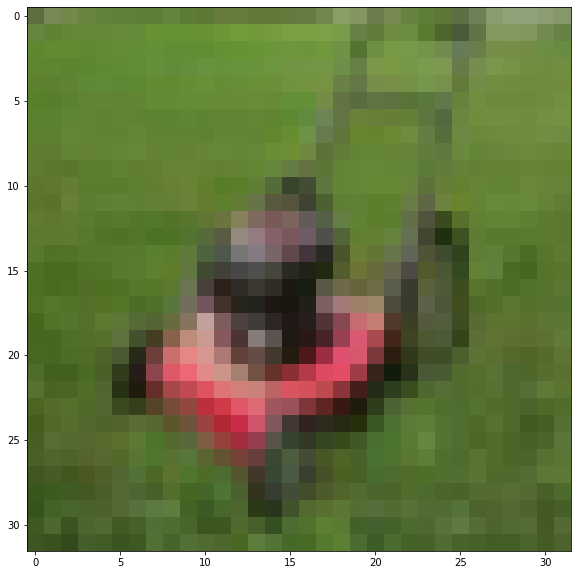

In [7]:
# Examine one of the images and is corresponding label
plt.imshow(X_train[500])
print(y_train[500])
plt.show()

In [8]:
# Load the list of labels from a JSON file
import json

with open('./dataset/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [9]:
# Print a few of the labels
cifar100_fine_labels[:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [10]:
# Print the corresponding label for the example above
cifar100_fine_labels[41]

'lawn_mower'

#### Load the data using different label modes

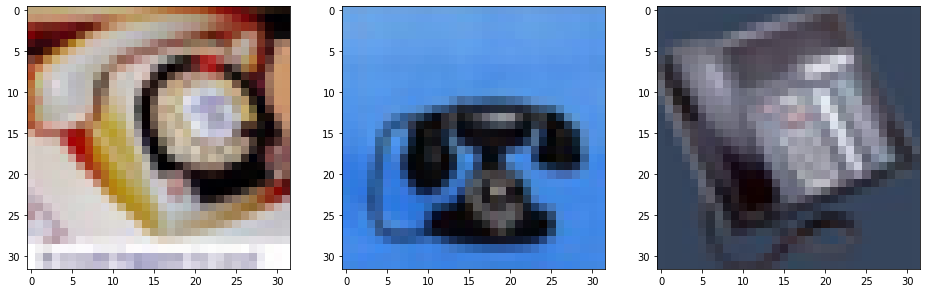

In [11]:
# Display a few examples from category 87 (index 86) and the list of labels
examples = X_train[(y_train.T == 86)[0]][:3]

fix, ax = plt.subplots(1, 3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])
plt.show()

In [12]:
# Reload the data using the coarse label mode
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='coarse')

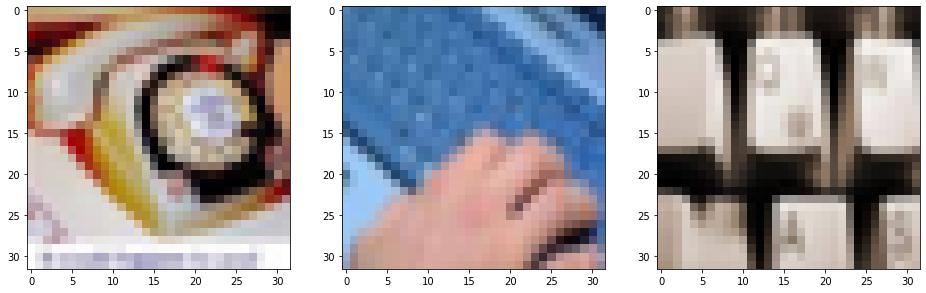

In [13]:
# Display a few examples from category 6 (index 5) and the list of labels
examples = X_train[(y_train.T == 5)[0]][:3]

fix, ax = plt.subplots(1, 3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])
plt.show()

In [14]:
# Load the list of coarse labels from a JSON file
with open('dataset/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [15]:
# Print a few of the labels
cifar100_coarse_labels[:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [16]:
# Print the corressponding labels for the examples above
print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### Load the IMDB Dataset

In [17]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [18]:
# Print an example from the training dataset, along with its corressponding label
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [19]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in X_train]

In [20]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [21]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 
(X_train, y_train), (X_test, y_test) = imdb.load_data(skip_top=50, oov_char=2)

In [22]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in X_train]

In [23]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [24]:
# Define the functions for filtering the sequences
def remove_oov_char(element):
    """ Filter function for removing the oov_char """
    return [word for word in element if word != 2]

def filter_list(lst):
    """ Run remove_oov_char on elements in a list """
    return [remove_oov_char(element) for element in lst]

In [25]:
# Remove the oov_char from the sequences using the filter_list function
X_train = filter_list(X_train)

In [26]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in X_train]

# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


## Dataset Generators

All of the datasets that we can load in using the Keras API can comfortably fit into memory. That's great because it makes it really easy to work with them, but in practice datasets are often a lot bigger and won't fit into memory. One way to handle this is to use detaset generators. This is a way to feed data into model without loading it all up in your memory at once. If you've ever come across Python generators before, this idea might already be familiar to you. A generator in Python is a function that returns an object that you can iterate over, and it yields a series of values, but it doesn't store all those value in memory. Instead, it saves its own internal state, and each time we iterate the generator, it yields the next value in the series. So as you might have guessed, in this way, we can use generators to feed data into our model when the data doesn't fit into memory. 

### Example 1
```python
def text_file_reader(filepath):
    with open(filepath, 'r') as f:
        for row in f:
            yield row
            
text_datagen = text_file_reader('data_file.txt')

next(text_datagen)
next(text_datagen)
```

### Example 2
```python
def get_data(batch_size):
    while Ture:
        y_train = np.random.choice([0, 1], (batch_size, 1))
        X_train = np.random.randn(batch_size, 1) + (2 * y_train - 1)
        yield X_train, y_train
        
datagen = get_data(32)
X, y = next(dataget)
```

### Example 3 (Model Training and Evaluation)
```python
# Train the model
model = Sequential([Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', optimizer='sgd')
model.fit(datagen, steps_per_epoch=1000, epochs=10)

for _ in range(10000):
    X_train, y_train = next(datagen)
    model.train_on_batch(X_train, y_train)
    
# Evaluate the model
model.evaluate(datagen_eval, steps=100)

# Predict the model
model.predict(datagen_test, steps=100)
```

### Coding Tutorial

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [27]:
# Load the fertility dataset
headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('./dataset/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)

In [28]:
fertility.shape

(100, 10)

In [29]:
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [30]:
# Map the 'output feature from 'N' to 0 an d from 'O' to 1
fertility['Output'] = fertility['Output'].map(lambda x: 0.0 if x == 'N' else 1.0)
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [31]:
fertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    100 non-null    float64
 1   Age       100 non-null    float64
 2   Diseases  100 non-null    int64  
 3   Trauma    100 non-null    int64  
 4   Surgery   100 non-null    int64  
 5   Fever     100 non-null    int64  
 6   Alcohol   100 non-null    float64
 7   Smoking   100 non-null    int64  
 8   Sitting   100 non-null    float64
 9   Output    100 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [32]:
# Convert the DataFrame so that the features are mapped to floats
fertility = fertility.astype('float32')

In [33]:
# Shuffle the DataFrame
fertility = fertility.sample(frac=1).reset_index(drop=True)

In [34]:
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-1.00,0.78,1.0,0.0,1.0,0.0,1.0,-1.0,0.25,0.0
1,-0.33,0.61,1.0,0.0,1.0,0.0,1.0,-1.0,0.63,0.0
2,-1.00,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0
3,-0.33,0.83,1.0,1.0,1.0,0.0,1.0,-1.0,0.31,0.0
4,-1.00,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0


In [35]:
# Convert the field Season to a one-hot encoded vector
fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [36]:
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.78,1.0,0.0,1.0,0.0,1.0,-1.0,0.25,0.0,1,0,0,0
1,0.61,1.0,0.0,1.0,0.0,1.0,-1.0,0.63,0.0,0,1,0,0
2,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0,1,0,0,0
3,0.83,1.0,1.0,1.0,0.0,1.0,-1.0,0.31,0.0,0,1,0,0
4,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0,1,0,0,0


In [37]:
# Move the output column such that it is the last column in the DataFrame
fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [38]:
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.78,1.0,0.0,1.0,0.0,1.0,-1.0,0.25,0.0,1,0,0,0
1,0.61,1.0,0.0,1.0,0.0,1.0,-1.0,0.63,0.0,0,1,0,0
2,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,0.0,1,0,0,0
3,0.83,1.0,1.0,1.0,0.0,1.0,-1.0,0.31,0.0,0,1,0,0
4,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.44,0.0,1,0,0,0


In [39]:
# Convert the DataFrame to numpy array
fertility = fertility.to_numpy()

#### Split the data

In [40]:
# Split the dataset into training and validation set
training = fertility[:70]
validation = fertility[70:]

In [41]:
# Verify the shape of the data
print(training.shape)
print(validation.shape)

(70, 13)
(30, 13)


In [42]:
# Separate features and labels for the validation and training data
training_features = training[:, :-1]
training_labels = training[:, -1]
validation_features = validation[:, :-1]
validation_labels = validation[:, -1]

#### Create the Generator

In [43]:
# Create a function that returns a a generator producing inputs and labels
def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features) / batch_size)):
        yield (features[n * batch_size:(n + 1) * batch_size], labels[n * batch_size:(n + 1) * batch_size])

In [44]:
# Apply the function to our training features and labels with a batch size of 10
train_generator = get_generator(training_features, training_labels, batch_size=10)

In [45]:
# Test the generator using the next() function
next(train_generator)

(array([[ 0.78,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.25,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.61,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.63,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.5 ,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.83,  1.  ,  1.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.31,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.56,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.44,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  0.  ,  1.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.61,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  1.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.31,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.53,  1.  ,  0.  ,  0.  ,  1.  ,  0.8 , -1.  ,  0.31,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.81,  1.  ,  1.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.38,  0.  ,
 

#### Build the model

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12, )
output_shape = (1, )

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model(inputs=model_input, outputs=output)

In [47]:
# Display the model summary to show the resultant structure
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [48]:
# Create the optimizer object
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [49]:
# Compile the model with loss function and metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [50]:
# Calculate the number of training steps per epoch for the given batch size.
batch_size = 5
train_steps = len(training) // batch_size
epochs = 3

In [51]:
# Train the model 
for e in range(epochs):
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
    model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator, validation_steps=1)

14/14 [==============================] - 0s 7ms/step - loss: 0.1018 - accuracy: 0.9857 - val_loss: 0.0720 - val_accuracy: 0.9667


#### Make an infinitely looping generator

In [52]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features) / batch_size)):
            yield (features[n * batch_size:(n + 1) * batch_size], labels[n * batch_size:(n + 1) * batch_size])
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [53]:
# Create a generator using this function
train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [54]:
# Assert that the new cyclic generator does not raise a StopIteration
for i in range(2 * train_steps):
    next(train_generator_cyclic)

In [55]:
# Generate a cyclic validation generator
validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [56]:
model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps, validation_data=validation_generator_cyclic, validation_steps=1, epochs=3)

Epoch 1/3
14/14 [==============================] - 0s 6ms/step - loss: 0.1058 - accuracy: 0.9571 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9714 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 0s 4ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 2.1316e-04 - val_accuracy: 1.0000


#### Evaluate the model and get predictions

In [57]:
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [58]:
predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0.]


In [59]:
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [60]:
# Evaluate the model
model.evaluate_generator(validation_generator,steps=1)

[0.0008277277811430395, 1.0]

## Keras image data augmentation

### Example
```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#fill_mode為填充模式，當對圖片進行平移、放縮等操作時，圖片中會出現一些缺失的地方，那這些缺失的地方該用什麼方式補全呢？就由fill_mode中的參數確定
image_data_gen = ImageDataGenerator(rescale=1/255.,  # 壓縮資料到 0~1 之間
                                    horizontal_flip=True, # 隨機反轉圖片資料
                                    height_shift_range=0.2, # 隨機垂直移動 ±20%
                                    fill_mode='nearest', 
                                    featurewise_center=True)
#featurewise_center：圖像原始值的3個通道-圖像原始值的3個通道的均值（圖片數組的各個channel上的值減去對應channel上的平均值）

#samplewise_center：圖像原始值-圖像原始值的唯一均值（圖片數組所有值減去唯一的全局平均值）


image_data_gen.fit(X_train)

train_datagen = image_data_gen.flow(X_train, y_train, batch_size=16)
model.fit(train_datagen, epochs=20)
```

### Coding Tutorial

#### Load the CIFAR-10 dataset

In [61]:
from tensorflow.keras.datasets import cifar10

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [62]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [63]:
# Create a function that returns a data generate
def get_generator(features, labels, batch_size):
    for n in range(int(len(features) / batch_size)):
        yield (features[n * batch_size:(n + 1) * batch_size], labels[n * batch_size: (n + 1) * batch_size])

In [64]:
# Use the function we created to get a training data generator with a batch size of 1
training_generator = get_generator(training_features, training_labels, batch_size=1)

In [65]:
# Assess the shape of the items generated by training_generator using the next function to yield an item
image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


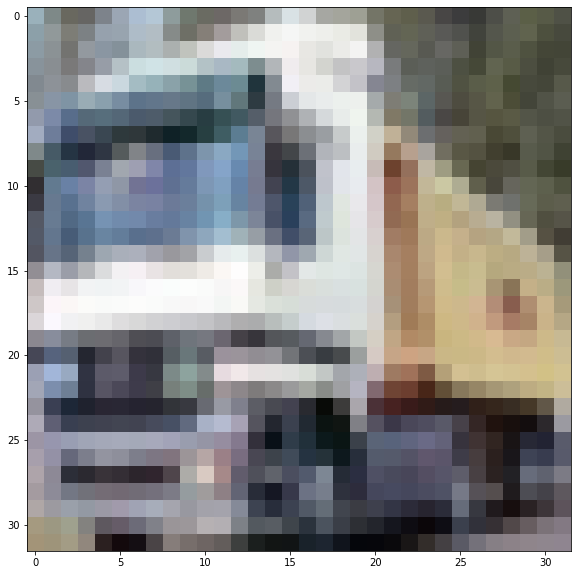

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [66]:
# Test training generator
image, label = next(training_generator)
image_unbatched = image[0]
plt.imshow(image_unbatched)
plt.show()
print(label)

In [67]:
# Reset the generator by re-running the get_generator function
train_generator = get_generator(training_features, training_labels, batch_size=1)

#### Create an data augmentation generator

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
# Create a function to convert an image to monochrome
def monochrome(x):
    def func_bw(a):
        average_color = np.mean(a)
        return [average_color, average_color, average_color]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [70]:
# Create an ImageDataGenerator object
image_generator = ImageDataGenerator(
    preprocessing_function=monochrome,
    rotation_range=180,
    rescale=1/255.
)

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [71]:
# Create an iterable generator
image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1, shuffle=False)

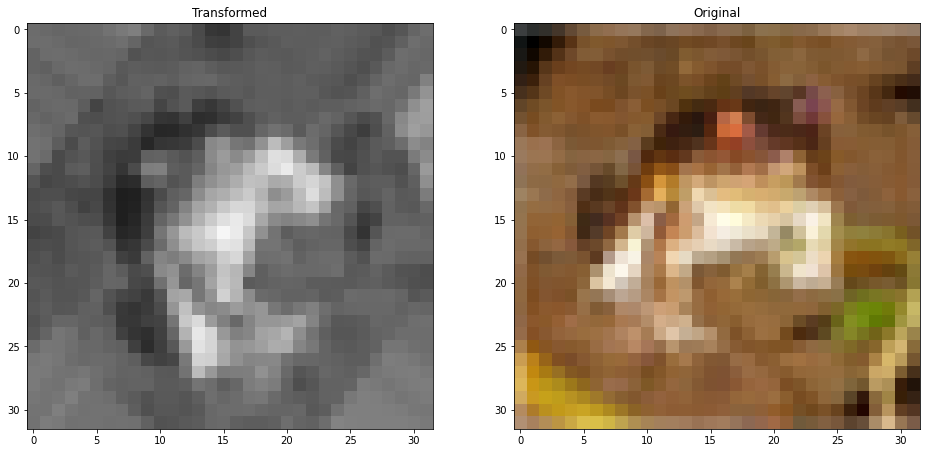

In [72]:
# Show a sample from the genrator and compare with the original
image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)

figs, axes = plt.subplots(1, 2)
axes[0].imshow(image[0])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

You can create generator from the directory that store the data.

```python
train_path = 'dataset/flowers-recognition-split/train'
val_path = 'dataset/flowers-recognition-split/val'

# Create an ImageDataGenerator object
datagenerator = ImageDataGenerator(rescale=(1/255.))

classes = ['daisy', 'dandelion', 'rose', 'sumflower', 'tulip']

# Create a data generator
train_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(16, 16))
val_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes=classes, target_size=(16, 16))

|__ train
    |______ daisy
    |______ dandelion
    |______ roses
    |______ sunflowers
    |______ tulips
|__ val
    |______ daisy
    |______ dandelion
    |______ roses
    |______ sunflowers
    |______ tulips

```

# A simple data augmentation example

![A simple data augmentation example](https://github.com/popolee0513/Data-Science-Skills-Practice/blob/master/TensorFlow:%20Advanced%20Techniques/Customising%20your%20models%20with%20TensorFlow%202/PIC/keras_data_augmentation_jitter.png?raw=true)
Figure: Left: A sample of 250 data points that follow a normal distribution exactly. Right: Adding a small amount of random “jitter” to the distribution. This type of data augmentation increases the generalizability of our networks.

Let’s consider Figure  (left) of a normal distribution with zero mean and unit variance.

Training a machine learning model on this data may result in us modeling the distribution exactly — however, in real-world applications, data rarely follows such a nice, neat distribution.

Instead, to increase the generalizability of our classifier, we may first randomly jitter points along the distribution by adding some random values $\epsilon $ drawn from a random distribution (right).

Our plot still follows an approximately normal distribution, but it’s not a perfect distribution as on the left.

A model trained on this modified, augmented data is more likely to generalize to example data points not included in the training set.

![keras_data_augmentation_in_place](https://github.com/popolee0513/Data-Science-Skills-Practice/blob/master/TensorFlow:%20Advanced%20Techniques/Customising%20your%20models%20with%20TensorFlow%202/PIC/keras_data_augmentation_in_place.png?raw=true)

This type of data augmentation is what Keras’ ImageDataGenerator class implements.

Using this type of data augmentation we want to ensure that our network, when trained, sees new variations of our data at each and every epoch.

The figure above demonstrates the process of applying in-place data augmentation:

>Step 1: An input batch of images is presented to the ImageDataGenerator .

>Step 2: The ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.

>Step 3: The randomly transformed batch is then returned to the calling function.

There are two important points that I want to draw your attention to:

>1. The ImageDataGenerator is not returning both the original data and the transformed data — the class only returns the randomly transformed data.

>2. We call this “in-place” and “on-the-fly” data augmentation because this augmentation is done at training time (i.e., we are not generating these examples ahead of time/prior to training).

When our model is being trained, we can think of our ImageDataGenerator class as “intercepting” the original data, randomly transforming it, and then returning it to the neural network for training, all the while the NN has no idea the data was modified!

<img src="https://github.com/popolee0513/Data-Science-Skills-Practice/blob/master/TensorFlow:%20Advanced%20Techniques/Customising%20your%20models%20with%20TensorFlow%202/PIC/keras_data_augmentation_incorrect.png?raw=true" width="500"/>

In the above illustration the ImageDataGenerator accepts an input batch of images, randomly transforms the batch, and then returns both the original batch and modified data — again, this is not what the Keras ImageDataGenerator does. Instead, the ImageDataGenerator class will return just the randomly transformed data.

When I explain this concept to readers the next question is often:

>>But Adrian, what about the original training data? Why is it not used? Isn’t the original training data still useful for training?

Keep in mind that the entire point of the data augmentation technique described in this section is to ensure that the network sees “new” images that it has never “seen” before at each and every epoch.

If we included the original training data along with the augmented data in each batch, then the network would “see” the original training data multiple times, effectively defeating the purpose. Secondly, recall that the overall goal of data augmentation is to increase the generalizability of the model.

To accomplish this goal we “replace” the training data with randomly transformed, augmented data.

In practice, this leads to a model that performs better on our validation/testing data but perhaps performs slightly worse on our training data (to due to the variations in data caused by the random transforms).


[data-augmentation](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)

In [104]:
#https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/